# Simple modifications of the mach zehnder notebook to calculate with fixed $\theta_{i},i=1,2$ to speed things up a little since here we only care about the values of $\theta$ and $\beta$

In [18]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from sympy import *
from sympy.plotting import plot3d,plot
from mpl_toolkits.mplot3d import Axes3D
init_printing(use_unicode=True)

In [19]:
jones1= Matrix([0,1])
jones0= Matrix([1,0])

In [20]:
theta=Symbol('theta',real=True)
beta=Symbol('beta',real=True)
def N_mach(N,k):
    if k==1:
        lista=list()
        K=symarray('theta', N+1,real=True)
        for i in range(1,N+1):
            l=i
            BS=Matrix([[cos(K[i]),I*sin(K[i])],[I*sin(K[i]),cos(K[i])]])
            lista.append(BS)
    else:
        t=np.pi/(2)
        lista=Matrix([[cos(t/N),I*sin(t/N)],[I*sin(t/N),cos(t/N)]])
    return lista

def N_mach_zehnder(N,k):
    K=N_mach(N,k)
    jones1= Matrix([0,1])
    jones0= Matrix([1,0])
    M1=Matrix([[1,0],[0,1]])
    A=Matrix([[ 1,0],[0,beta*exp(I*theta)]])
    r=jones0
    if k==1:
        for i in range(0,N):
            if i==N-1:
                r=simplify(K[i]*r)
            else:
                r=simplify(M1*A*K[i]*r)
    else:
        r=K*(M1*A*K)**(N-1)*r
    return r
        

def N_Interferomemer(N,k):
    r=N_mach_zehnder(N,k)
    p1=jones0.T*r
    p1=p1[0]*conjugate(p1[0])
    p1=re(p1)
    p2=jones1.T*r
    p2=p2[0]*conjugate(p2[0])
    p2=re(p2)
    pabs=1-p1-p2
    K=symarray('theta', N+1,real=True)
    return pabs,p1,p2,K

In [54]:
pabs,pd1,pd2,K=N_Interferomemer(5,2)

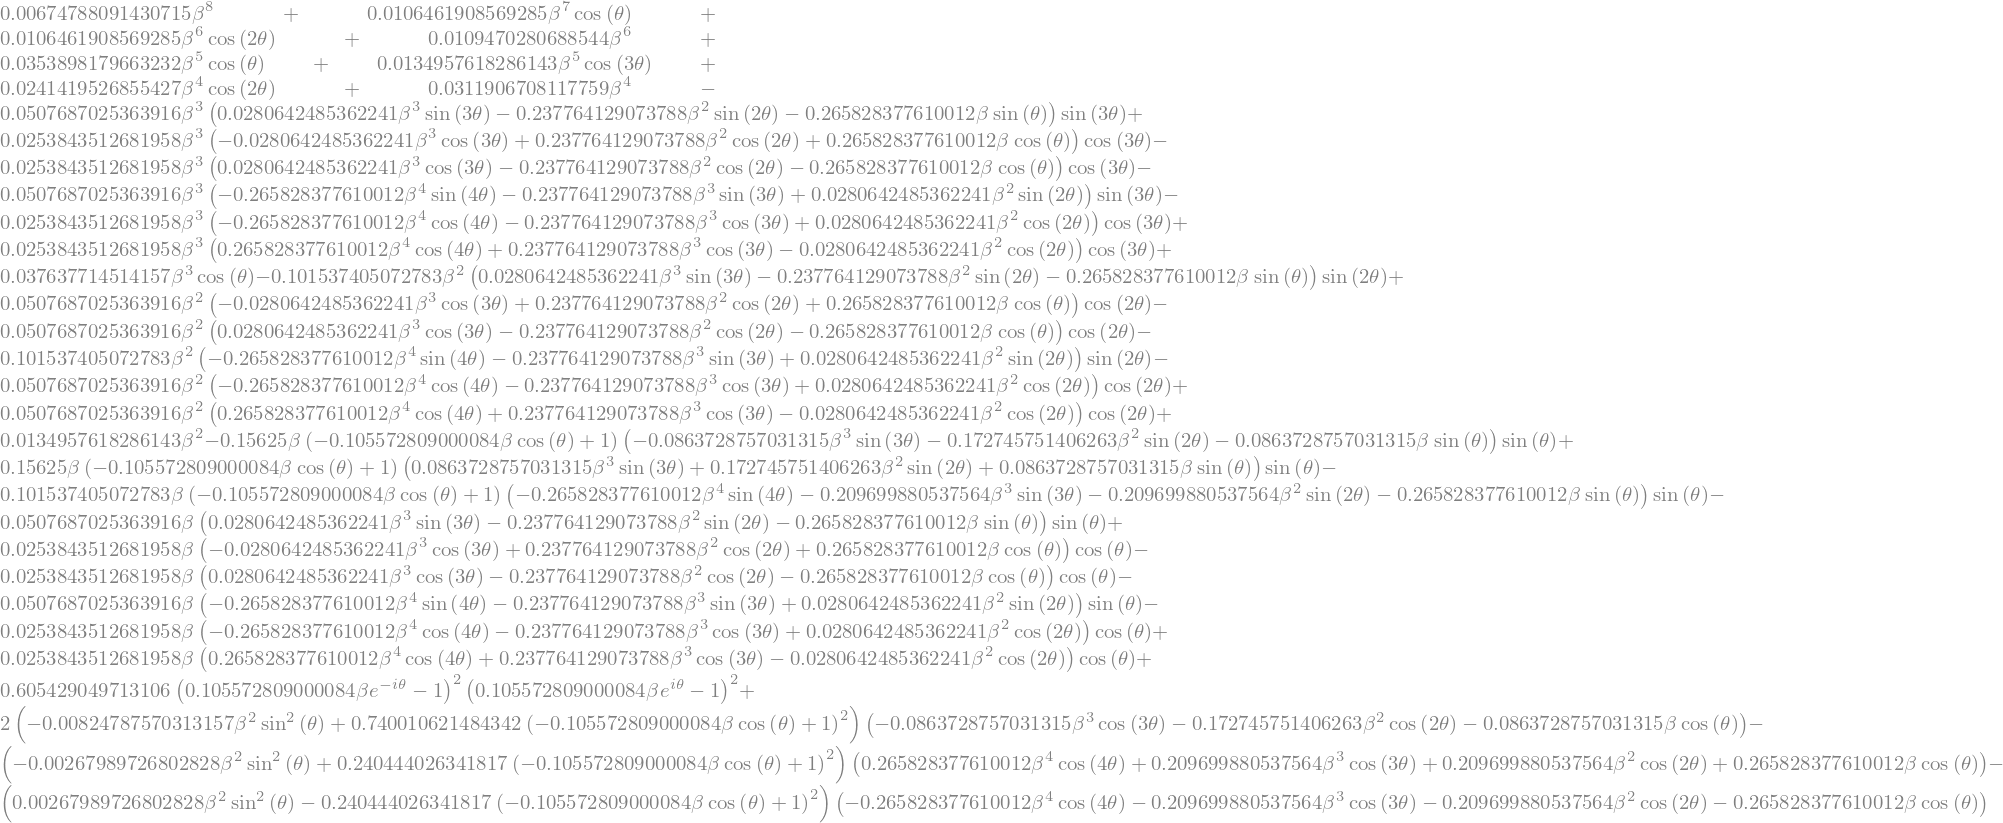

In [55]:
pd1

In [56]:
def con_barra(plot,n):
    plot2 = plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    backend = plot2.backend(plot2)
    backend.ax = ax
    backend._process_series(backend.parent._series, ax, backend.parent)
    plt.close(backend.fig)
    ax.collections[0].set_cmap('viridis') # optionally change the colormap
    cbar=plt.colorbar(ax.collections[0],ticks=[0.2,0.4,0.6,0.8,0.99])
    cbar.ax.tick_params(labelsize=20)
    plt.xticks(fontsize=13)
    ax.set_xlabel(r'$\beta$',fontsize=20)
    ax.set_ylabel(r'$\Delta$',fontsize=20)
    if n==1:
        ax.set_title(r'$P_{D_{1}}$',fontsize=25)
    elif n==2:
        ax.set_title(r'$P_{D_{2}}$',fontsize=25)
    else:
        ax.set_title(r'$P_{abs}$',fontsize=25)
    plt.yticks(np.arange(-np.pi/2,3*np.pi /2 +1, step=np.pi/2),[r'$-\pi$',r'$-\frac{\pi}{2}$',0,r'$\frac{\pi}{2}$',r'$\pi$'],fontsize=13)
    ax.set_zticks([0,0.5,1],[r'$0$',r'$0.5$',r'$1$'])
    for t in ax.zaxis.get_major_ticks(): t.label.set_fontsize(13)
    return plt.show()

<IPython.core.display.Javascript object>


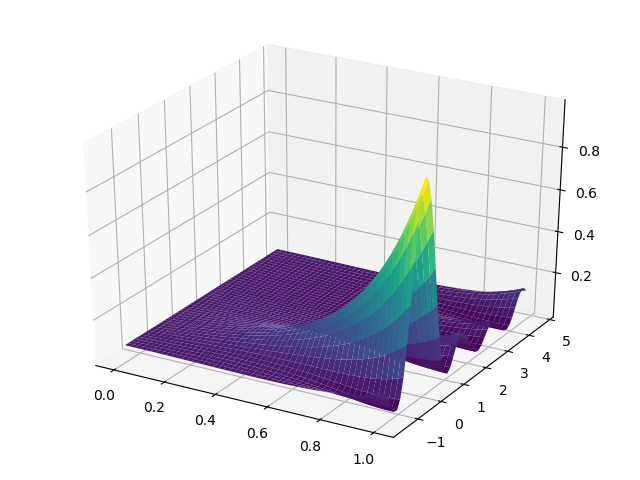

<IPython.core.display.Javascript object>


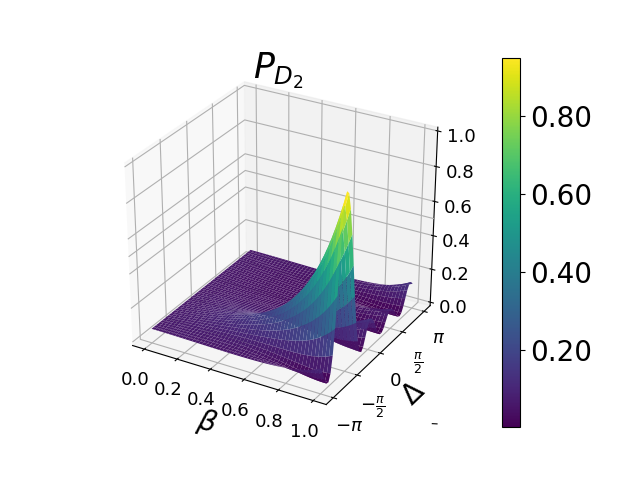

<IPython.core.display.Javascript object>


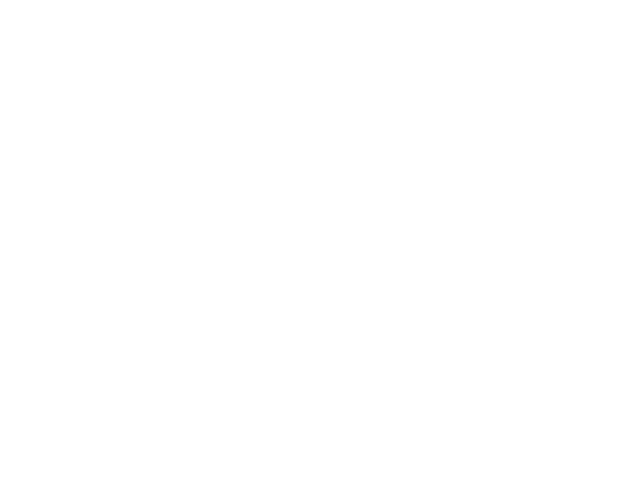

In [59]:
con_barra(plot3d(pd2,(beta,0,1),(theta,-np.pi/2,3*np.pi/2)),2)